<a href="https://colab.research.google.com/github/Zike01/US-Police-Data/blob/master/Fatal_Force.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
# %pip install --upgrade plotly

## Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter
import matplotlib.dates as mdates

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')


from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Load the Data

In [ ]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
print(f'df_hh_income shape: {df_hh_income.shape}')
print(f'df_pct_poverty shape: {df_pct_poverty.shape}')
print(f'df_pct_completed_hs shape: {df_pct_completed_hs.shape}')
print(f'df_share_race_city shape: {df_share_race_city.shape}')
print(f'df_fatalities shape: {df_fatalities.shape}')

df_hh_income shape: (29322, 3)
df_pct_poverty shape: (29329, 3)
df_pct_completed_hs shape: (29329, 3)
df_share_race_city shape: (29268, 7)
df_fatalities shape: (2535, 14)


In [ ]:
print(f'df_hh_income.columns: {df_hh_income.columns}')
print(f'df_pct_poverty.columns: {df_pct_poverty.columns}')
print(f'df_pct_completed_hs.columns: {df_pct_completed_hs.columns}')
print(f'df_share_race_city.columns: {df_share_race_city.columns}')
print(f'df_fatalities.columns: {df_fatalities.columns}')

df_hh_income.columns: Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
df_pct_poverty.columns: Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
df_pct_completed_hs.columns: Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
df_share_race_city.columns: Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
df_fatalities.columns: Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [ ]:
print(f'df_hh_income.isna().values.any(): {df_hh_income.isna().values.any()}')
print(f'df_pct_poverty.isna().values.any(): {df_pct_poverty.isna().values.any()}')
print(f'df_pct_completed_hs.isna().values.any(): {df_pct_completed_hs.isna().values.any()}')
print(f'df_share_race_city.isna().values.any(): {df_share_race_city.isna().values.any()}')
print(f'df_fatalities.isna().values.any(): {df_fatalities.isna().values.any()}')

df_hh_income.isna().values.any(): True
df_pct_poverty.isna().values.any(): False
df_pct_completed_hs.isna().values.any(): False
df_share_race_city.isna().values.any(): False
df_fatalities.isna().values.any(): True


In [ ]:
print(f'df_hh_income.duplicated().values.any(): {df_hh_income.duplicated().values.any()}')
print(f'df_pct_poverty.duplicated().values.any(): {df_pct_poverty.duplicated().values.any()}')
print(f'df_pct_completed_hs.duplicated().values.any(): {df_pct_completed_hs.duplicated().values.any()}')
print(f'df_share_race_city.duplicated().values.any(): {df_share_race_city.duplicated().values.any()}')
print(f'df_fatalities.duplicated().values.any(): {df_fatalities.duplicated().values.any()}')

df_hh_income.duplicated().values.any(): False
df_pct_poverty.duplicated().values.any(): False
df_pct_completed_hs.duplicated().values.any(): False
df_share_race_city.duplicated().values.any(): False
df_fatalities.duplicated().values.any(): False


In [ ]:
df_hh_income.fillna(0, inplace=True)
df_fatalities.fillna('undetermined', inplace=True)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [ ]:
df_pct_poverty.poverty_rate.replace('-', 0, inplace=True)
df_pct_poverty.poverty_rate = pd.to_numeric(df_pct_poverty.poverty_rate)

In [ ]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29329 non-null  object 
 1   City             29329 non-null  object 
 2   poverty_rate     29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [ ]:
us_state_poverty = df_pct_poverty.groupby('Geographic Area', as_index=False).agg({'poverty_rate' : pd.Series.mean})
us_state_poverty.sort_values('poverty_rate', ascending=True, inplace=True)
us_state_poverty

,Geographic Area,poverty_rate
31,NJ,8.16
50,WY,9.06
6,CT,9.14
19,MA,9.55
20,MD,10.27
39,RI,10.37
34,NY,11.64
44,UT,11.72
28,ND,12.13
12,IA,12.23


In [ ]:
bar = px.bar(us_state_poverty,
             x='Geographic Area',
             y='poverty_rate',
             hover_name='Geographic Area',
             color='poverty_rate',
             title='Average Poverty Rate by US State')

bar.update_layout(coloraxis_showscale=False,
                  xaxis_title='State',
                  yaxis_title='Poverty Rate',
                  font=dict(size=10)
                  )
bar.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [ ]:
df_pct_completed_hs.percent_completed_hs.replace('-', 0, inplace=True)
df_pct_completed_hs.percent_completed_hs = pd.to_numeric(df_pct_completed_hs.percent_completed_hs)

In [ ]:
df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Geographic Area       29329 non-null  object 
 1   City                  29329 non-null  object 
 2   percent_completed_hs  29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [ ]:
grad_by_us_state = df_pct_completed_hs.groupby('Geographic Area', as_index=False).agg({'percent_completed_hs' : pd.Series.mean})
grad_by_us_state.sort_values('percent_completed_hs', ascending=True, inplace=True)
grad_by_us_state

,Geographic Area,percent_completed_hs
43,TX,74.09
25,MS,78.47
10,GA,78.63
32,NM,78.97
18,LA,79.12
3,AZ,79.22
2,AR,79.95
0,AK,80.10
1,AL,80.16
40,SC,80.65


In [ ]:
grad_bar = px.bar(grad_by_us_state,
                  x='Geographic Area',
                  y='percent_completed_hs',
                  hover_name='Geographic Area',
                  title='High School Graduation Rate by US State',
                  color='percent_completed_hs',
                  color_continuous_scale=px.colors.sequential.Aggrnyl)

grad_bar.update_layout(xaxis_title='US State',
                       yaxis_title='Percentage Completed HS',
                       coloraxis_showscale=False)
grad_bar.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [ ]:
grad_and_poverty = grad_by_us_state.merge(us_state_poverty, on='Geographic Area')

In [ ]:
grad_and_poverty.head()

,Geographic Area,percent_completed_hs,poverty_rate
0,TX,74.09,19.50
1,MS,78.47,26.88
2,GA,78.63,23.66
3,NM,78.97,22.51
4,LA,79.12,22.29


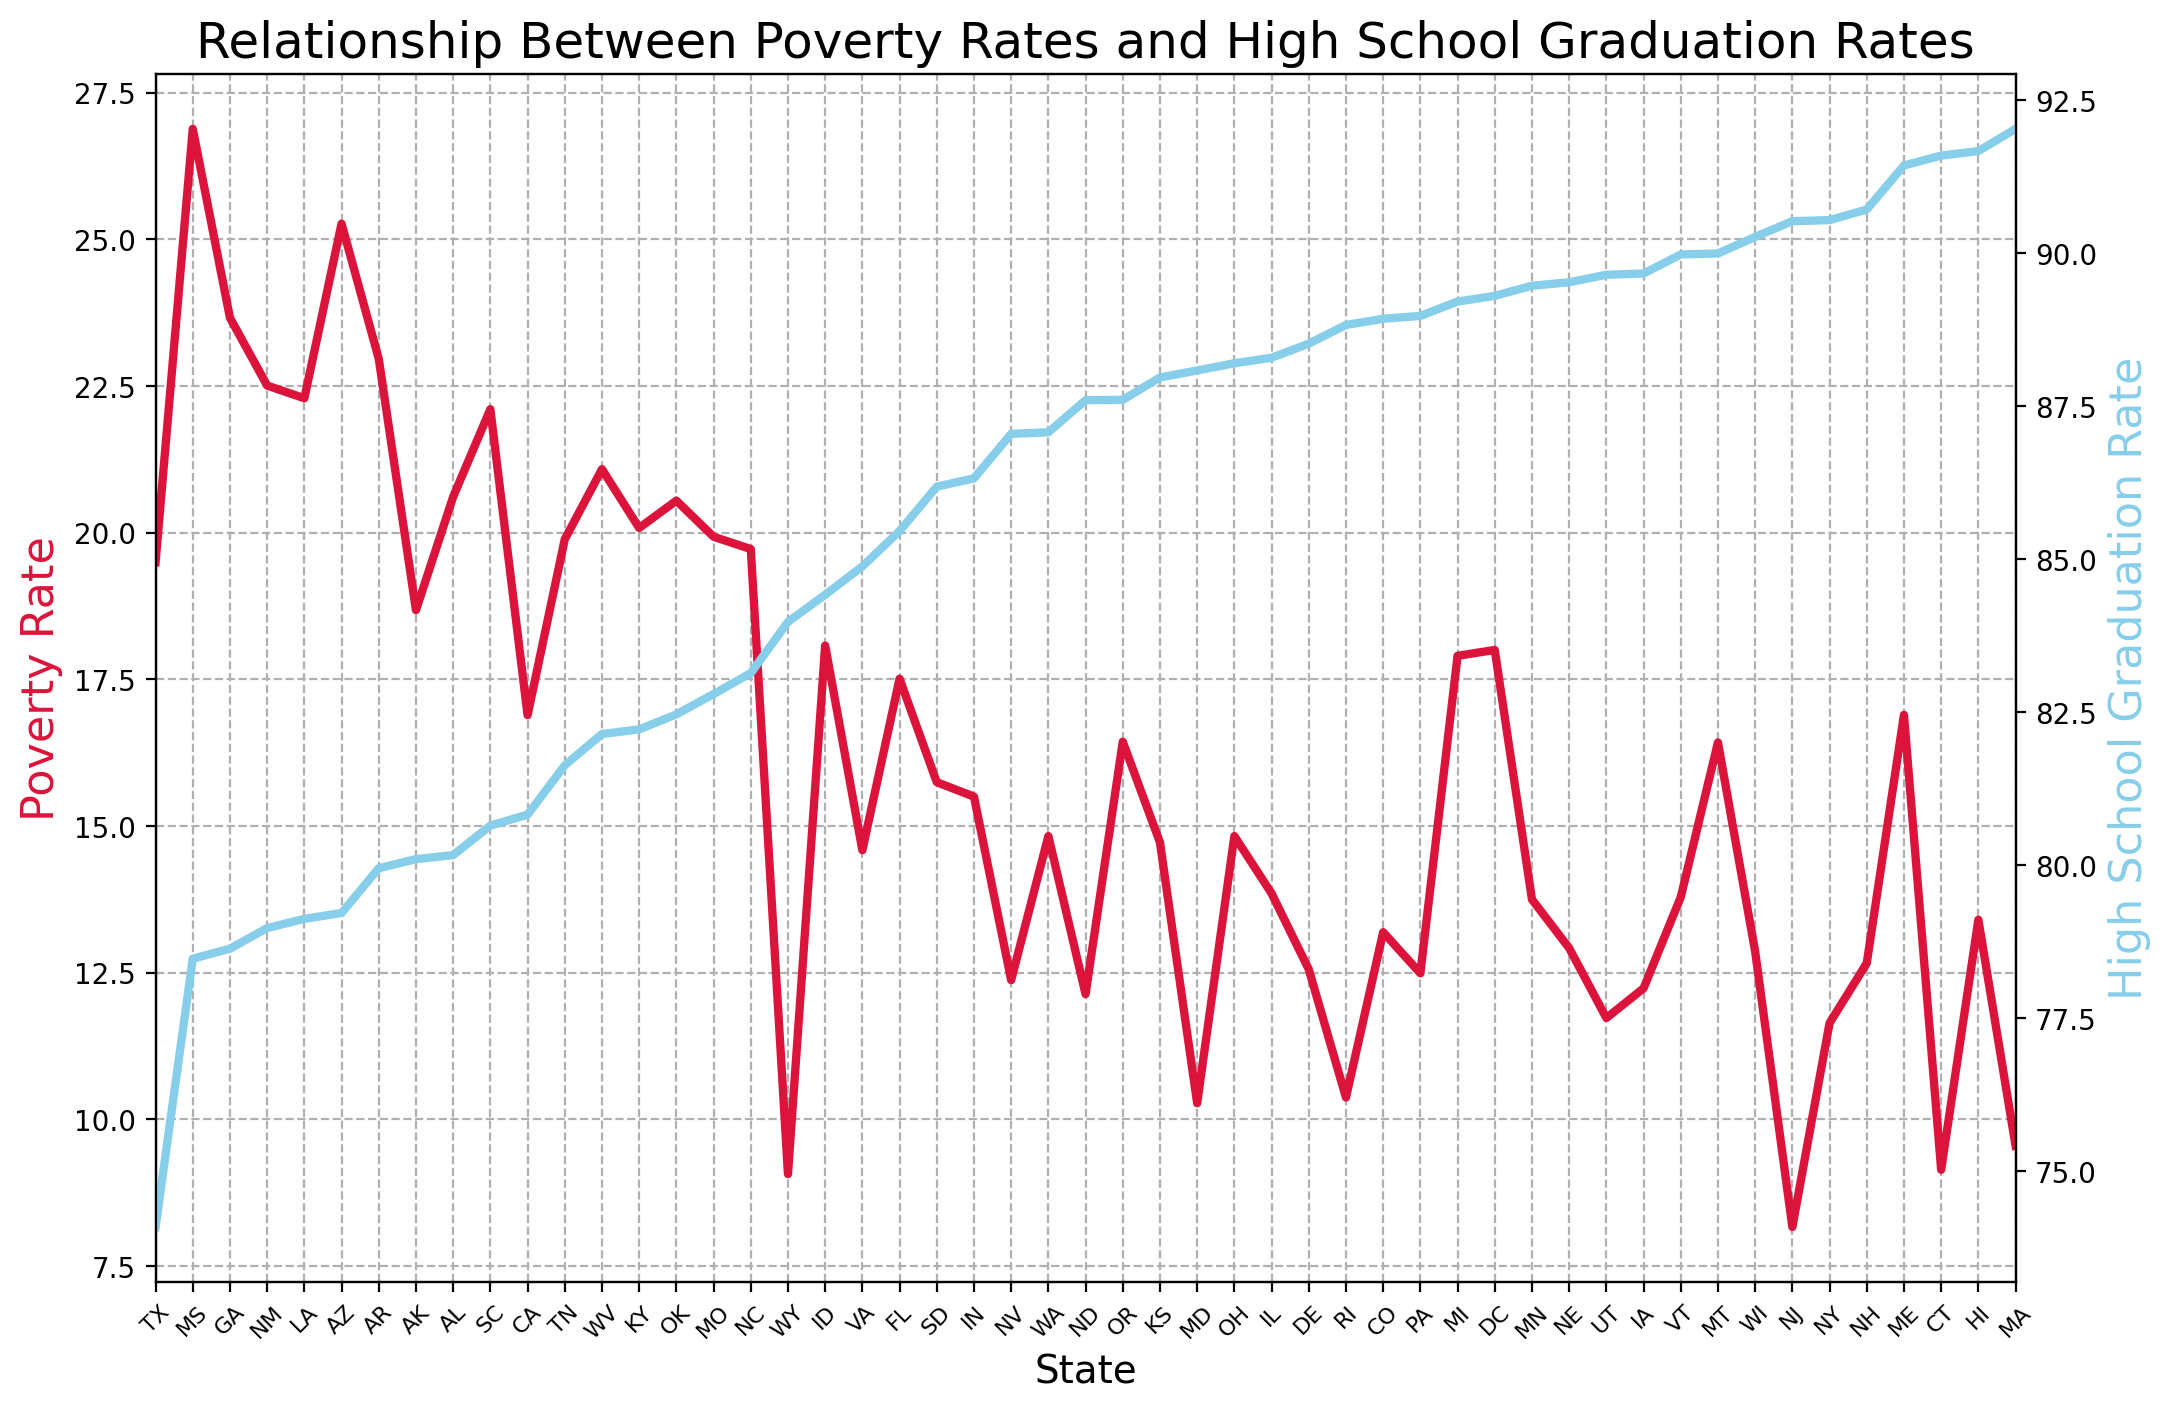

In [ ]:
plt.figure(figsize=(12,8), dpi=200)
plt.title('Relationship Between Poverty Rates and High School Graduation Rates', fontsize=18)
plt.xticks(fontsize=8, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(grad_and_poverty['Geographic Area'],
         grad_and_poverty['poverty_rate'],
         color='crimson',
         linewidth=3)

ax2.plot(grad_and_poverty['Geographic Area'],
         grad_and_poverty['percent_completed_hs'],
         color='skyblue',
         linewidth=3)
ax1.grid(which='major', axis='both', linestyle='dashed')
ax1.set_xlim(['TX', 'MA'])
ax1.set_xlabel('State', fontsize=14)
ax1.set_ylabel('Poverty Rate', fontsize=16, color='crimson')
ax2.set_ylabel('High School Graduation Rate', fontsize=16, color='skyblue')

plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

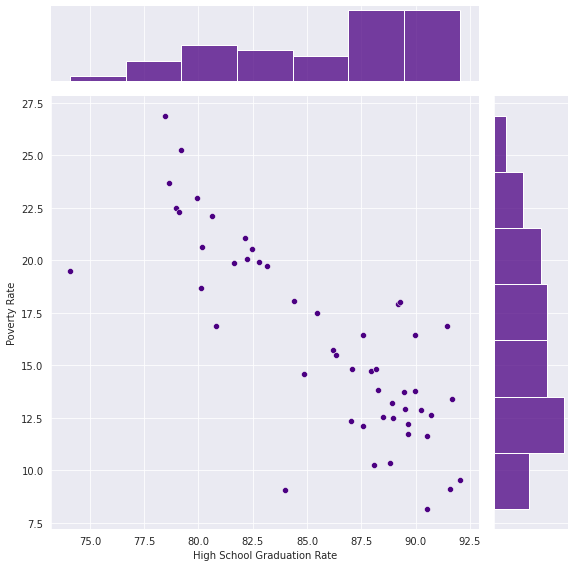

In [ ]:
with sns.axes_style('darkgrid'):
  h = sns.jointplot(data=grad_and_poverty,
                x='percent_completed_hs',
                y='poverty_rate',
                height=8,
                color='indigo')
  h.set_axis_labels('High School Graduation Rate', 'Poverty Rate')

plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

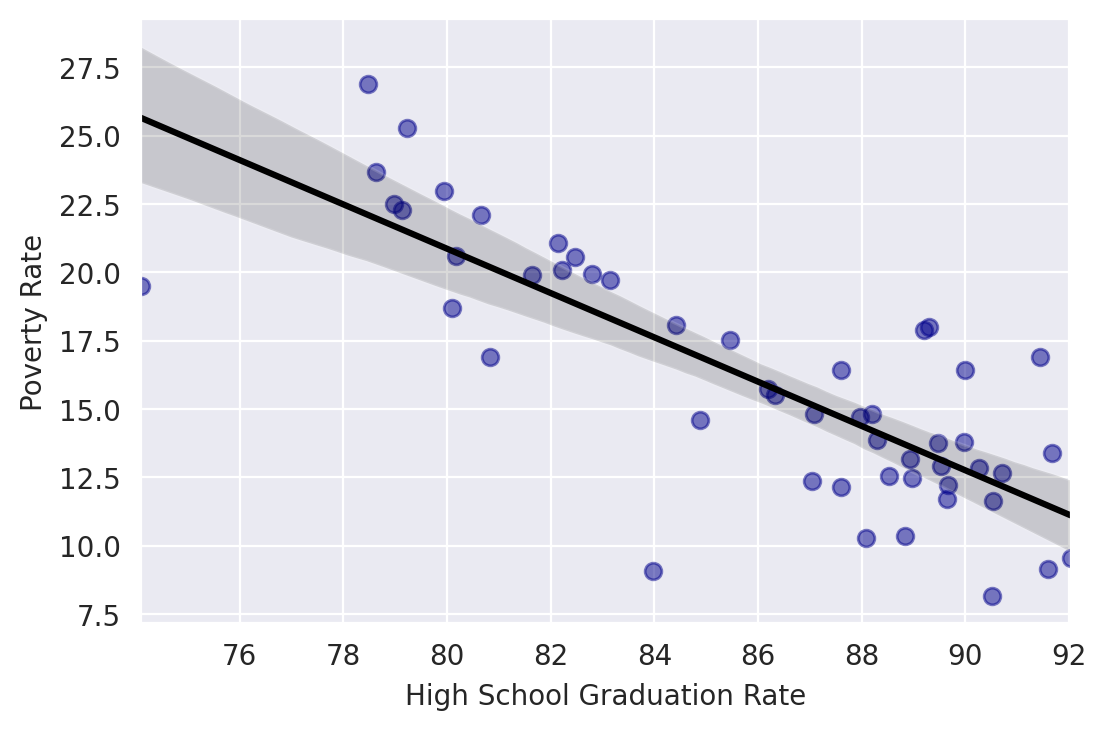

In [ ]:
plt.figure(dpi=200)
with sns.axes_style('darkgrid'):
  sns.regplot(data=grad_and_poverty,
              x='percent_completed_hs',
              y='poverty_rate',
              color='darkblue',
              line_kws={'color':'black'},
              scatter_kws={'alpha':0.5}
                )
plt.xlabel('High School Graduation Rate')
plt.ylabel('Poverty Rate')
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [ ]:
df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [ ]:
# Convert the share_x columns in df_share_race_city to numeric

cols = df_share_race_city.columns.drop(['Geographic area', 'City'])
df_share_race_city[cols] = df_share_race_city[cols].apply(pd.to_numeric, errors='coerce')

In [ ]:
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geographic area        29268 non-null  object 
 1   City                   29268 non-null  object 
 2   share_white            29248 non-null  float64
 3   share_black            29248 non-null  float64
 4   share_native_american  29248 non-null  float64
 5   share_asian            29248 non-null  float64
 6   share_hispanic         29248 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.6+ MB


In [ ]:
df_share_race_state = df_share_race_city.groupby('Geographic area', as_index=False).mean()
df_share_race_state.head()

,Geographic area,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AK,45.65,0.57,45.86,1.39,2.15
1,AL,72.51,23.32,0.66,0.48,2.98
2,AR,78.45,16.30,0.76,0.48,4.27
3,AZ,59.93,0.95,28.59,0.73,20.14
4,CA,71.87,2.69,1.72,5.57,29.65


In [ ]:
h_bar = px.bar(df_share_race_state,
               x=['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic'],
               y='Geographic area',
               orientation='h',
               hover_name='Geographic area',
               title='Racial Makeup of Each US State',
            )

h_bar.update_layout(xaxis_title='Share',
                    yaxis_title='US State',
                    legend_title='Race',
                    font = dict(size=10),
                    autosize=False,
                    width=1000,
                    height=800,
                    )

h_bar.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [ ]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
killed_by_race = df_fatalities.race.value_counts()
killed_by_race

W               1201
B                618
H                423
undetermined     195
A                 39
N                 31
O                 28
Name: race, dtype: int64

In [ ]:
fig = px.pie(names=['White', 'Black', 'Hispanic', 'Undetermined', 'Asian', 'Native American', 'Other'],
             values=killed_by_race.values,
             title='Fatalities by Race',
             hole=0.6)
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [ ]:
deaths_by_gender = df_fatalities.gender.value_counts()
deaths_by_gender

M    2428
F     107
Name: gender, dtype: int64

In [ ]:
fig = px.pie(names=['Male', 'Female'],
             values=deaths_by_gender.values,
             title='Number of Deaths of Men and Women',
             hole=0.6)
fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [ ]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
fig = px.box(df_fatalities,
             x='manner_of_death',
             y='age',
             color='manner_of_death')

fig.update_layout(xaxis_title='Manner of Death',
                  yaxis_title='Age')
fig.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [ ]:
is_armed = df_fatalities.armed.value_counts()
perc_unarmed = is_armed.unarmed/is_armed.sum() * 100 

print(f'Percentage of People Armed: {100-perc_unarmed:.3}%')

Percentage of People Armed: 93.3%


In [ ]:
fig = px.bar(x=is_armed.index,
             y=is_armed.values,
             hover_name = is_armed.index,
             color=is_armed.values,
             color_continuous_scale=px.colors.sequential.Viridis,
             title='What Kind of Weapon (if any) Was the Deceased Carrying?',
             log_y=True)
fig.update_layout(xaxis_title='Were People Armed?',
                  yaxis_title='Number of Killings',
                  coloraxis_showscale=False)
fig.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [ ]:
# Drop 'undetermined' values in the df_fatalities.age column and create a new dataframe, 'df_fatalities_clean'
df_fatalities_clean = df_fatalities.drop(df_fatalities.index[df_fatalities.age == 'undetermined'])

# Convert the age column in df_fatalities_clean to numeric
df_fatalities_clean.age = pd.to_numeric(df_fatalities_clean.age)


In [ ]:
under_25 = df_fatalities_clean[df_fatalities_clean.age < 25]
percentage_u25 = len(under_25)/len(df_fatalities_clean.age) * 100
print(f'Percentage of People Killed Under 25 Years Old: {percentage_u25:.3}%')

Percentage of People Killed Under 25 Years Old: 18.3%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

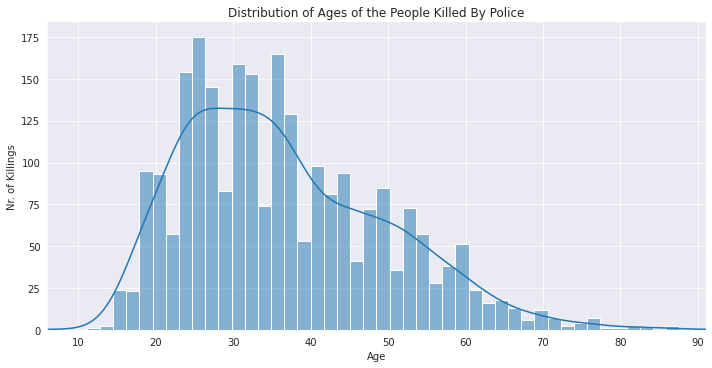

In [ ]:
with sns.axes_style('darkgrid'):
  sns.displot(df_fatalities_clean.age,
              bins=50,
              aspect=2,
              kde=True)
  
plt.title('Distribution of Ages of the People Killed By Police')
plt.xlabel('Age')
plt.ylabel('Nr. of Killings')
plt.xlim([df_fatalities_clean.age.min(), df_fatalities_clean.age.max()])
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

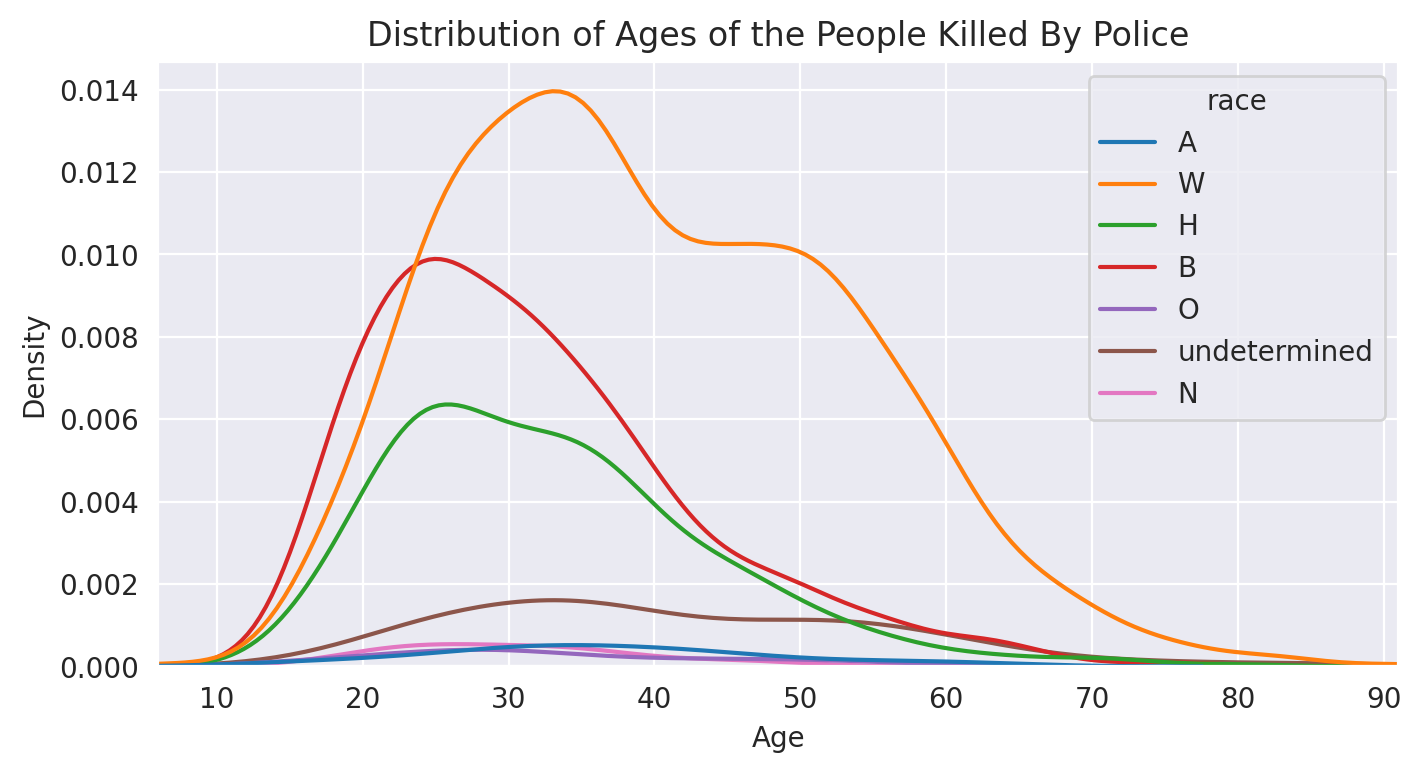

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  sns.kdeplot(df_fatalities_clean.age,
              hue=df_fatalities.race)
  
plt.title('Distribution of Ages of the People Killed By Police')
plt.xlabel('Age')
plt.xlim([df_fatalities_clean.age.min(), df_fatalities_clean.age.max()])
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [ ]:
killed_by_race

W               1201
B                618
H                423
undetermined     195
A                 39
N                 31
O                 28
Name: race, dtype: int64

In [ ]:
fig = px.bar(x=['White', 'Black', 'Hispanic', 'Undetermined', 'Asian', 'Native American', 'Other'],
             y=killed_by_race.values,
             hover_name=killed_by_race.index,
             color=killed_by_race.index,
             color_discrete_sequence=px.colors.qualitative.G10,
             title='Total Number of People Killed By Race')

fig.update_layout(xaxis_title='Race',
                  yaxis_title='Nr. of Killings',
                  showlegend=False)
fig.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [ ]:
has_mental_illness = df_fatalities[df_fatalities.signs_of_mental_illness == True]
perc_mental_illness = len(has_mental_illness)/len(df_fatalities) * 100

In [ ]:
print(f'Percentage of People Killed By Police Diagnosed with a Mental Illness: {perc_mental_illness:.3}%')

Percentage of People Killed By Police Diagnosed with a Mental Illness: 25.0%


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [ ]:
kills_by_city = df_fatalities.groupby('city', as_index=False).agg({'id' : pd.Series.count})
kills_by_city.sort_values('id', ascending=False, inplace=True)
top10_cities = kills_by_city[:10]

In [ ]:
fig = px.bar(top10_cities,
             x='city',
             y='id',
             hover_name='city',
             color='city',
             color_discrete_sequence=px.colors.qualitative.G10,
             title='Top 10 Cities with the Most Police Killings')

fig.update_layout(xaxis_title='City',
                  yaxis_title='Nr. of Killings',
                  showlegend=False)
fig.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [ ]:
city_race = df_fatalities.groupby(['city', 'race'], as_index=False).agg({'id' : pd.Series.count})
city_race.sort_values('id', ascending=False, inplace=True)
city_race

,city,race,id
294,Chicago,B,21
920,Los Angeles,H,19
721,Houston,B,15
84,Austin,W,13
1254,Phoenix,W,12
...,...,...,...
646,Greenwood,W,1
645,Greenville,undetermined,1
644,Greenville,W,1
642,Greensboro,W,1


In [ ]:
merged_df = pd.merge(city_race, top10_cities, on='city')
# change column names
merged_df.columns = ['city', 'race', 'kills_by_race', 'total_kills']
merged_df.sort_values('total_kills', inplace=True)

In [ ]:
h_bar = px.bar(merged_df,
               x='kills_by_race',
               y='city',
               hover_name='race',
               orientation='h',
               color='race',
               title='Rate of Death by Race in the Top 10 Cities')

h_bar.update_layout(xaxis_title='Nr. of Killings',
                    yaxis_title='City')
h_bar.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [ ]:
killings_by_state = df_fatalities.groupby('state', as_index=False).agg({'id':pd.Series.count})
killings_by_state.columns = ['state', 'Nr. of Killings']
killings_by_state.head()

,state,Nr. of Killings
0,AK,15
1,AL,50
2,AR,26
3,AZ,118
4,CA,424


In [ ]:
fig = px.choropleth(killings_by_state,
                    locations='state',
                    locationmode='USA-states',
                    hover_name='state',
                    color='Nr. of Killings',
                    color_continuous_scale=px.colors.sequential.matter,
                    scope='usa')
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [ ]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,month
0,3,Tim Elliot,2015-02-01,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,2
1,4,Lewis Lee Lembke,2015-02-01,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False,2
2,5,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False,3
3,8,Matthew Hoffman,2015-04-01,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False,4
4,9,Michael Rodriguez,2015-04-01,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False,4


In [ ]:
# Convert the date column in df_fatalities to datetime
df_fatalities.date = pd.to_datetime(df_fatalities.date)
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       2535 non-null   int64         
 1   name                     2535 non-null   object        
 2   date                     2535 non-null   datetime64[ns]
 3   manner_of_death          2535 non-null   object        
 4   armed                    2535 non-null   object        
 5   age                      2535 non-null   object        
 6   gender                   2535 non-null   object        
 7   race                     2535 non-null   object        
 8   city                     2535 non-null   object        
 9   state                    2535 non-null   object        
 10  signs_of_mental_illness  2535 non-null   bool          
 11  threat_level             2535 non-null   object        
 12  flee                     2535 non-

In [ ]:
killings_over_time = df_fatalities.groupby('date', as_index=False).agg({'id':pd.Series.count})
killings_over_time.sort_values('date', inplace=True)
killings_over_time_monthly = killings_over_time.resample('M', on='date').sum() #Resample the date column to monthly


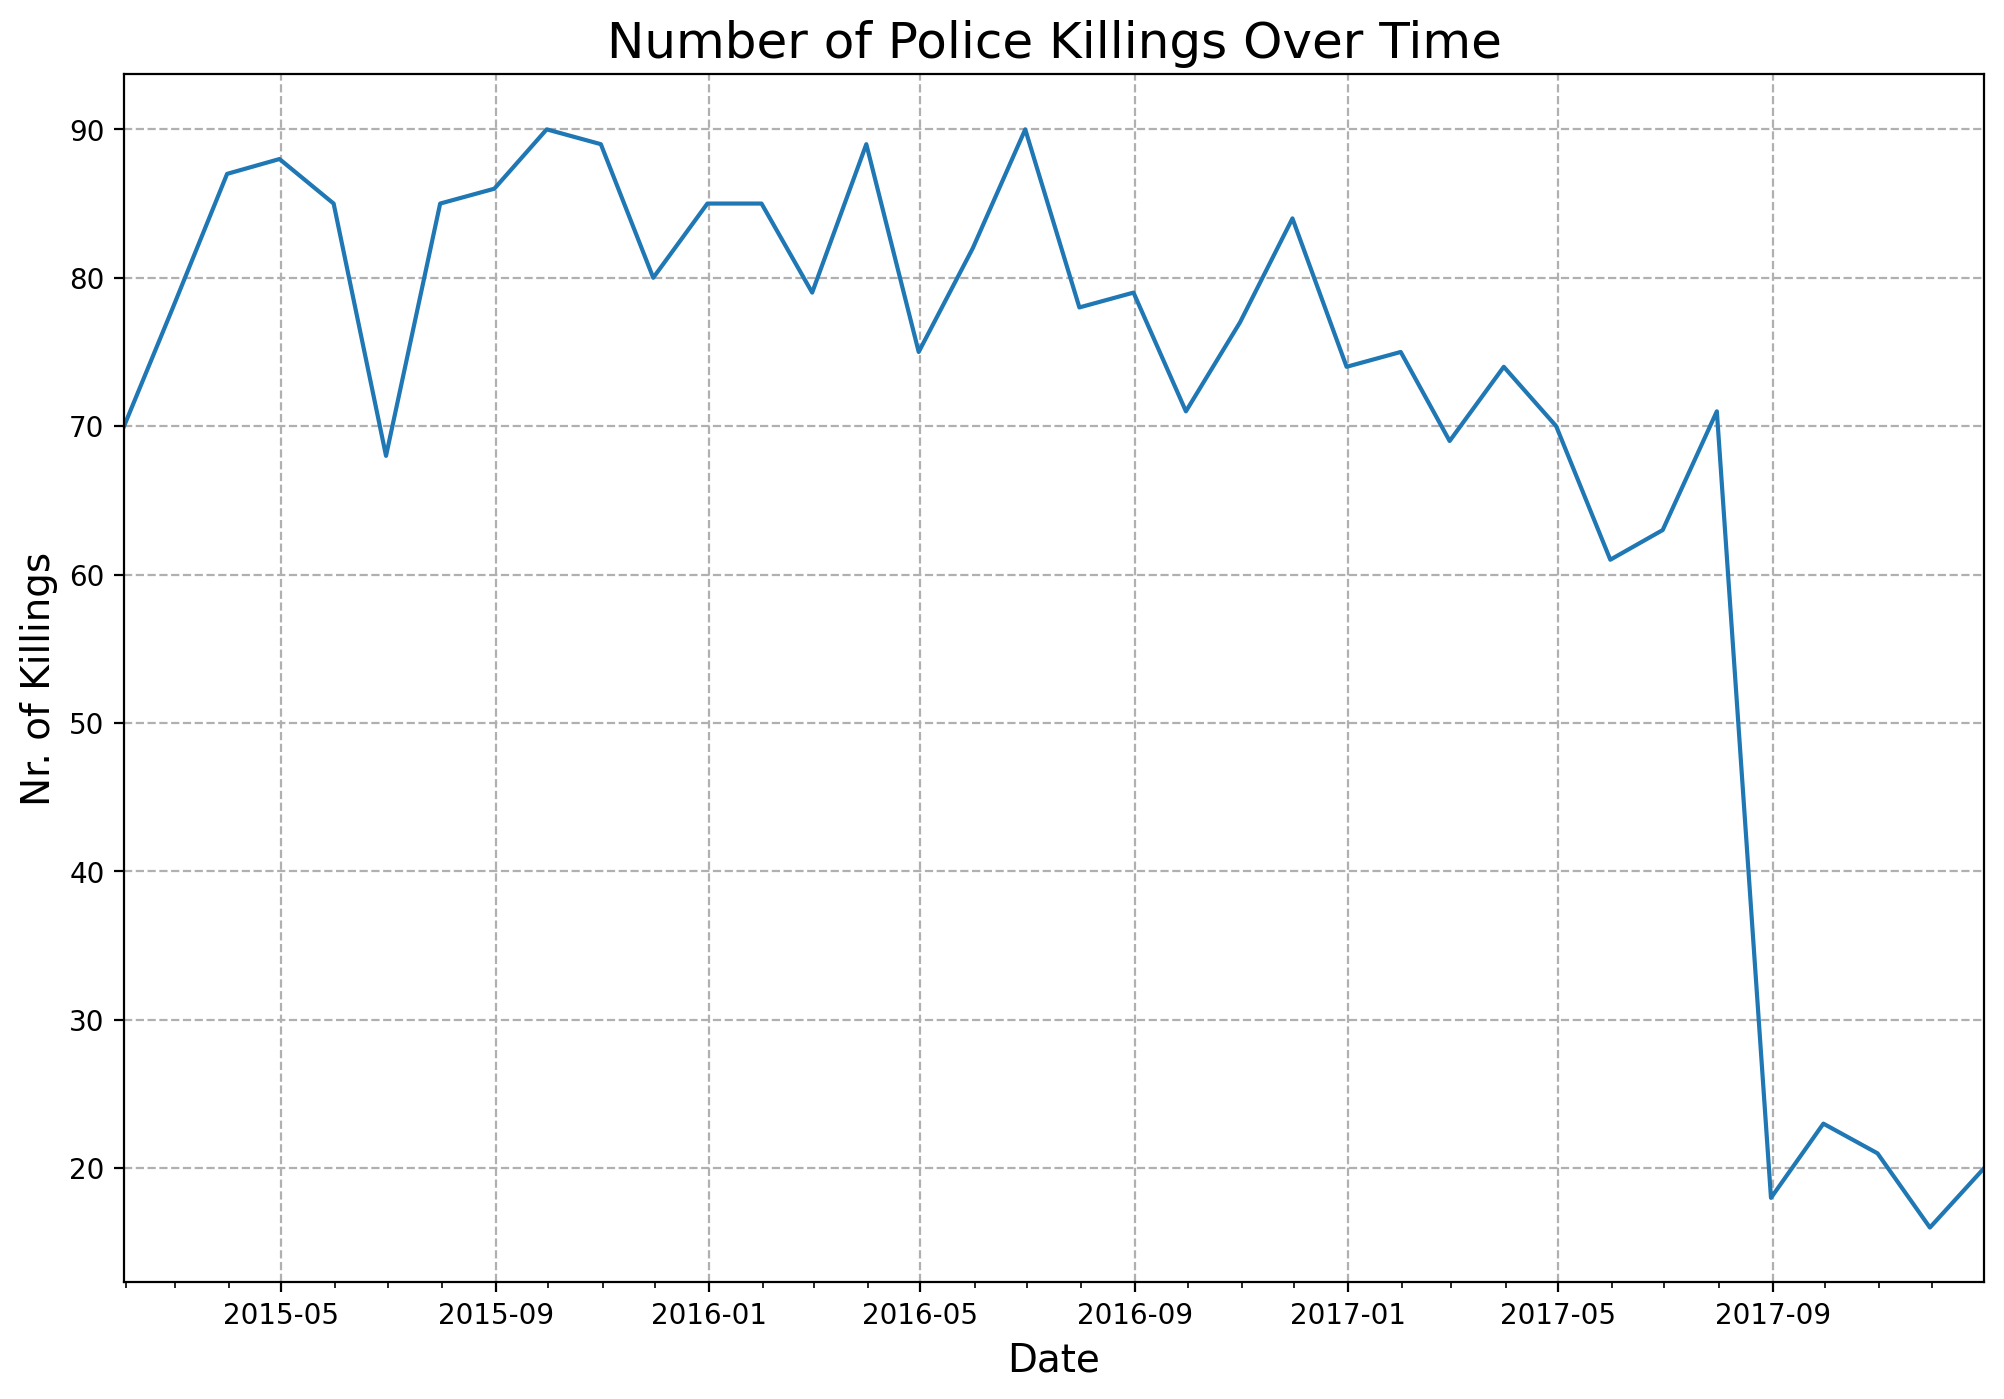

In [ ]:
plt.figure(figsize=(12,8), dpi=200)
plt.title('Number of Police Killings Over Time', fontsize=18)
plt.grid(which='major', axis='both', linestyle='dashed')
plt.plot(killings_over_time_monthly.index, 
         killings_over_time_monthly.id)

ax1 = plt.gca()

# format the ticks
ax1.xaxis.set_minor_locator(months)

plt.xlim([killings_over_time_monthly.index[0], killings_over_time_monthly.index[-1]])
plt.xlabel('Date', fontsize=14)
plt.ylabel('Nr. of Killings', fontsize=14)
plt.show()

The average number of police killings averaged roughly 80 from 2015 - 2016.

There was a huge drop in police killings from August of 2017.

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).